In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import scipy.misc

In [2]:
# data path 
depth_data_path = "/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs/depth/"
background_data_path = "/mnt/data/jarvislam1999/subject01_machine_recovery_3gps_2pairs/bg"
foreground_data_path = "/mnt/data/jarvislam1999/subject01_machine_recovery_3gps_2pairs/no_bg"

# store path
added_bg_data_path = "/mnt/data/jarvislam1999/subject01_machine_recovery_3gps_2pairs/added_bg/"


In [3]:
# get all subdirectories that contain images (frames)
#background_data_subdirt = os.listdir(background_data_path)
depth_data_subdirt = [r[0] for r in os.walk(depth_data_path)]
background_data_subdirt = [r[0] for r in os.walk(background_data_path)]
foreground_data_subdirt = [r[0] for r in os.walk(foreground_data_path)]
depth_data_subdirt.sort()
foreground_data_subdirt.sort()

background_data_subdirt = background_data_subdirt[1:]
foreground_data_subdirt = foreground_data_subdirt[1:]
fg_frames = os.listdir(foreground_data_subdirt[0])
fg_frames.sort()
depth_data_subdirt = foreground_data_subdirt[0].replace(foreground_data_path + '/', depth_data_path)
depth_frames = depth_data_subdirt + '/' + fg_frames[0]
print(os.path.isfile(depth_frames))
print(depth_frames)
print(fg_frames)

True
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs/depth/quick_pronation_01_all/00001.jpg
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg']


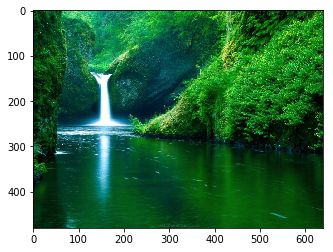

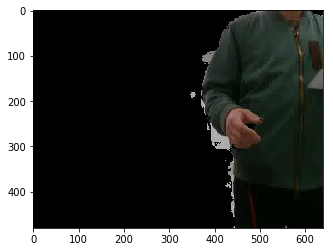

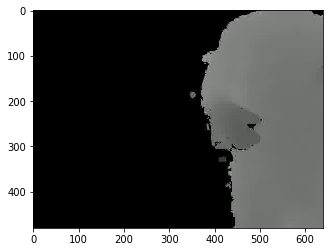

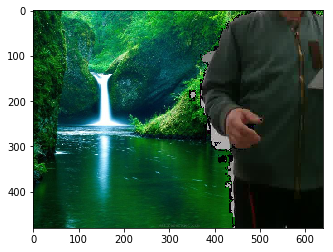

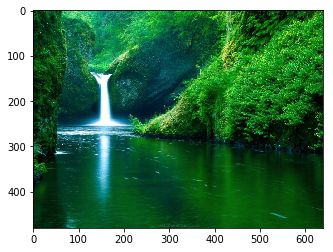

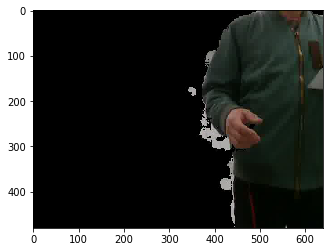

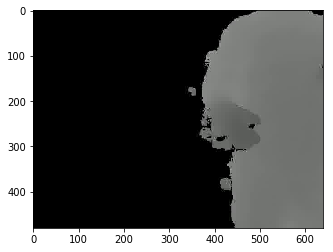

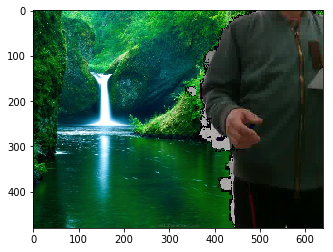

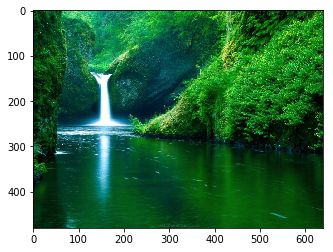

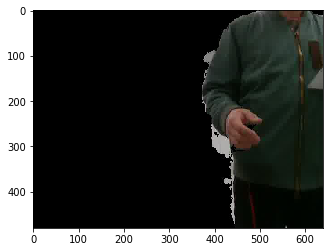

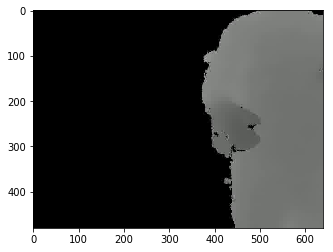

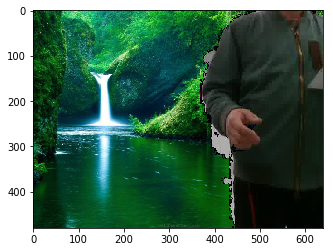

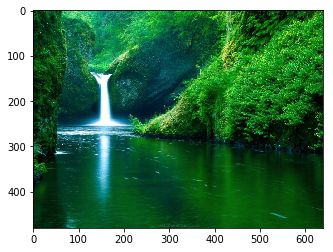

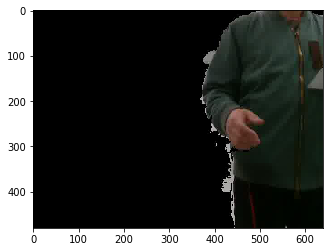

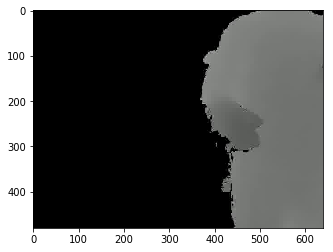

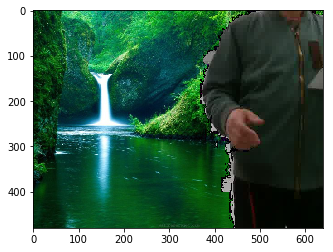

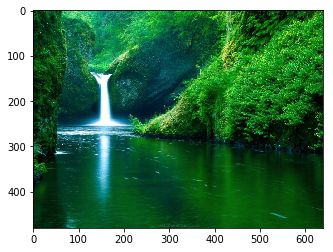

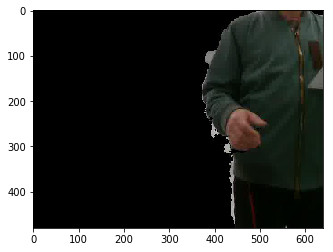

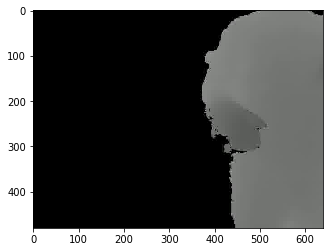

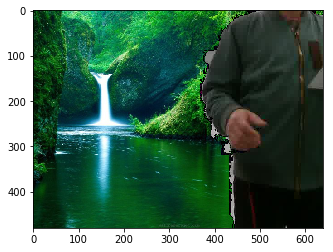

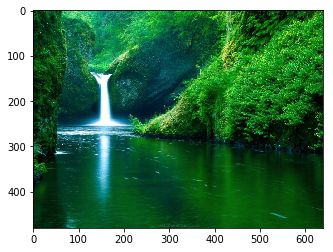

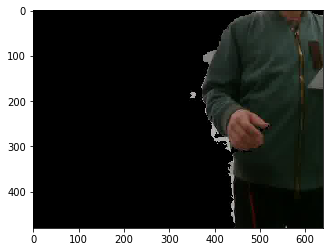

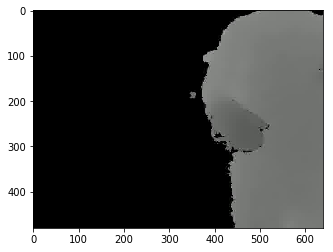

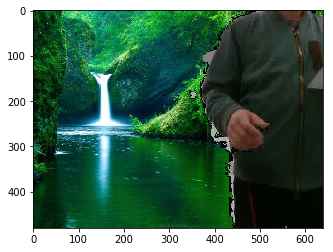

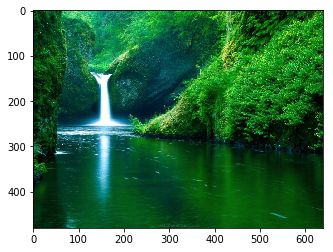

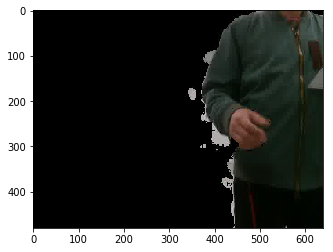

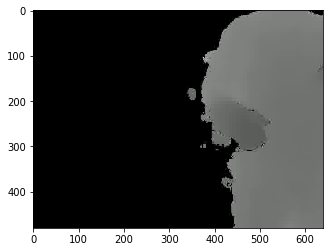

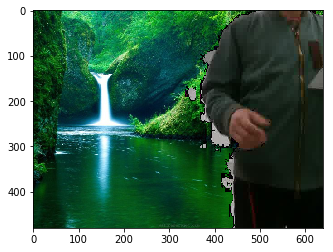

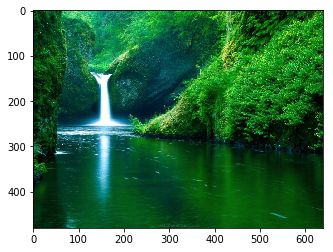

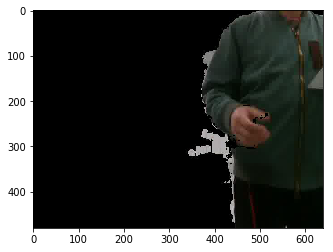

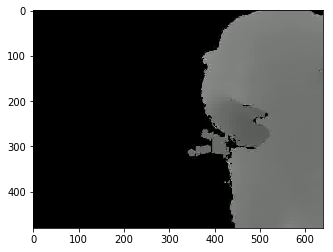

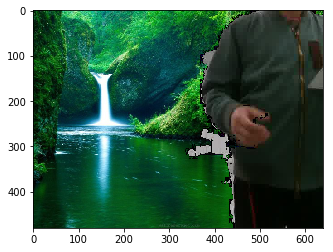

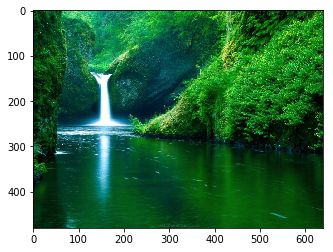

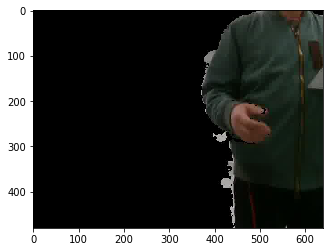

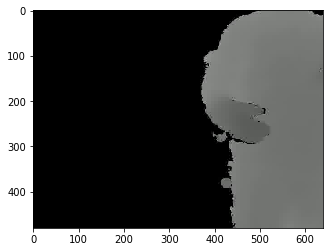

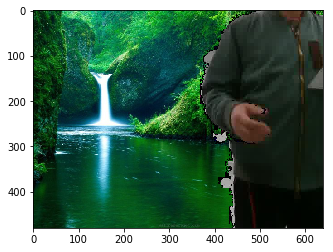

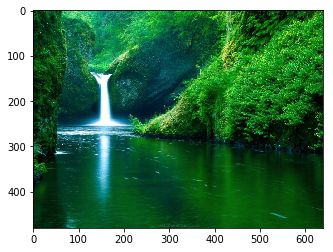

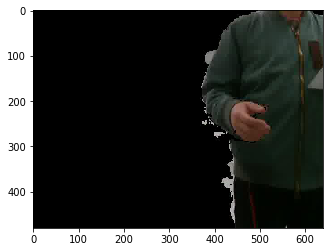

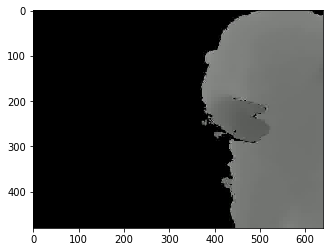

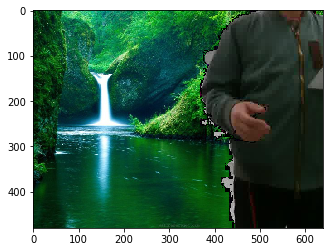

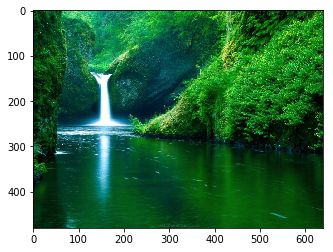

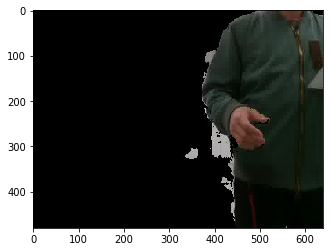

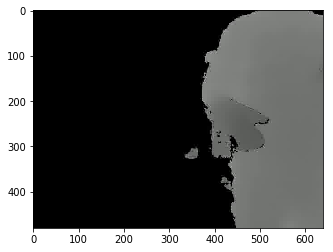

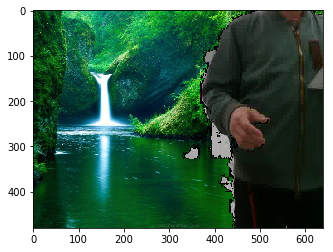

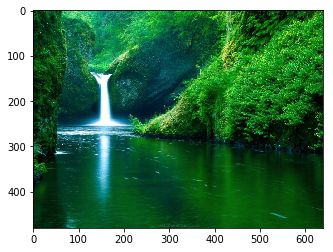

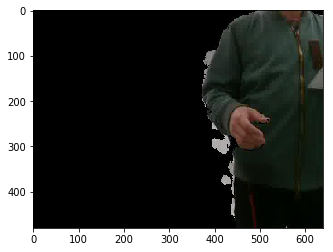

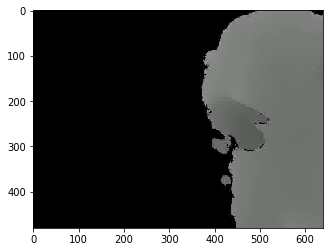

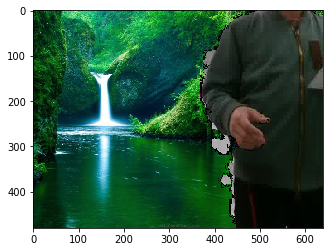

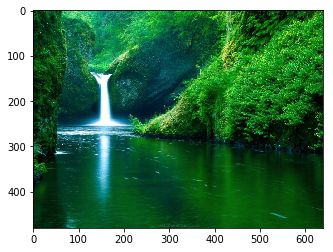

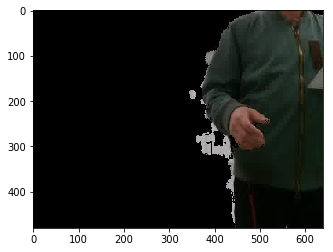

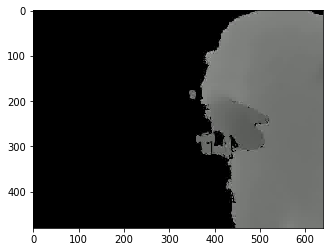

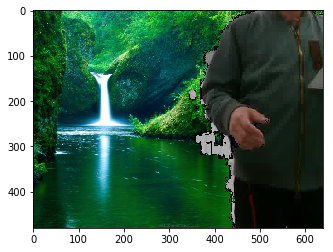

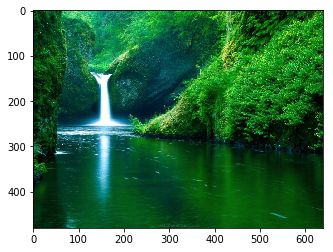

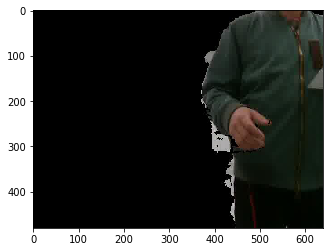

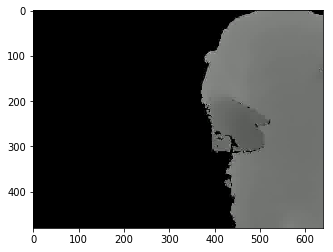

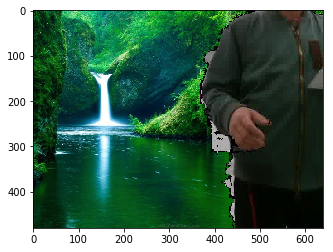

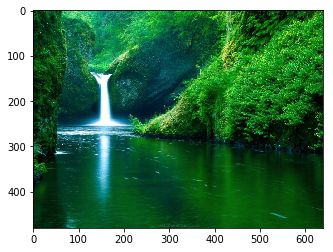

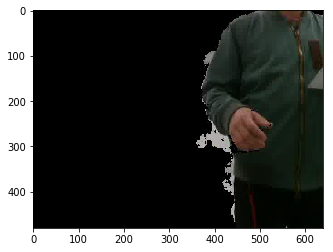

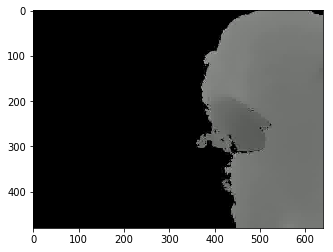

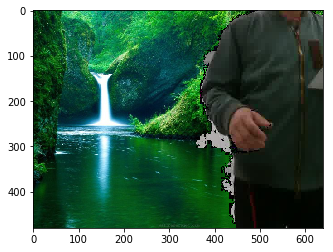

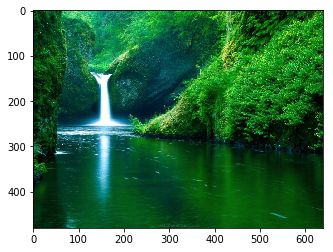

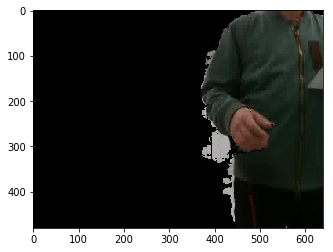

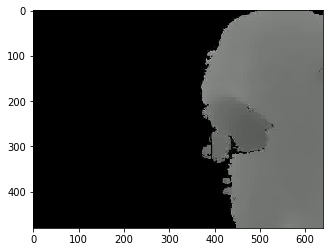

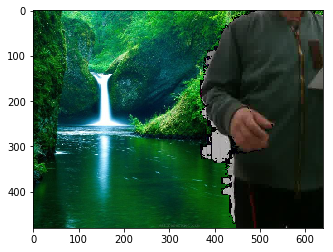

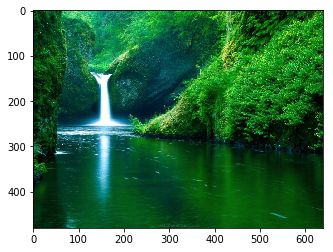

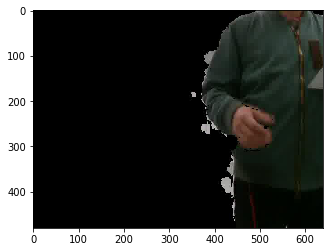

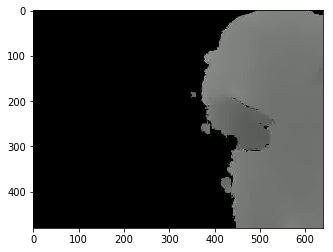

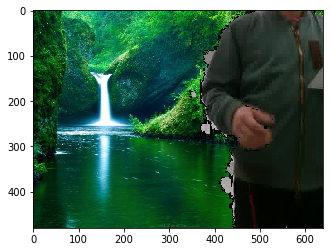

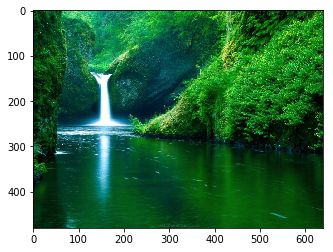

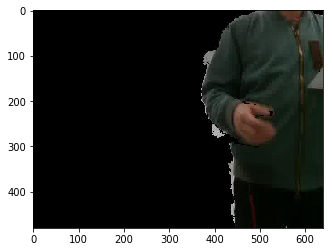

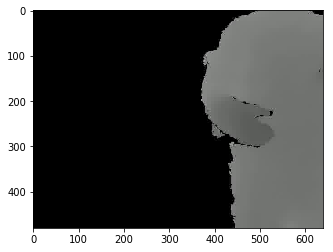

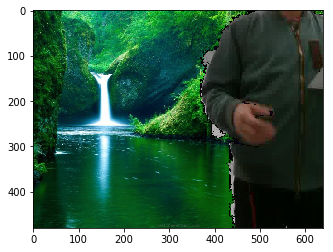

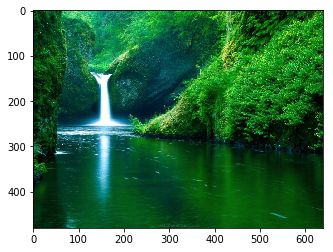

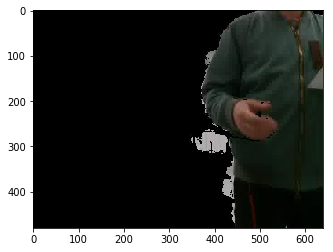

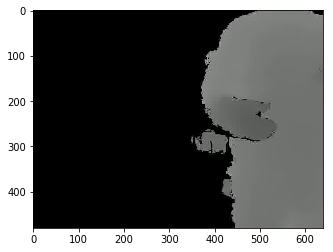

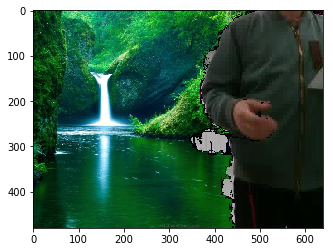

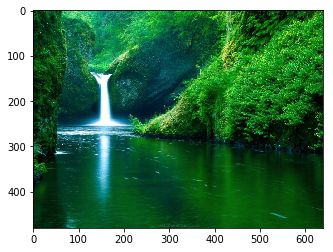

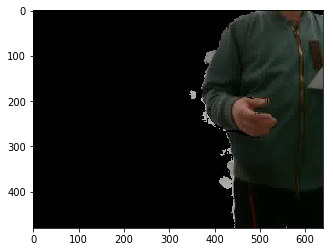

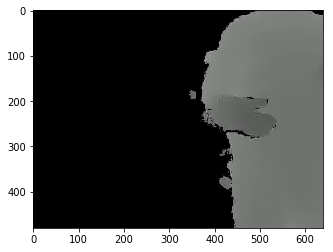

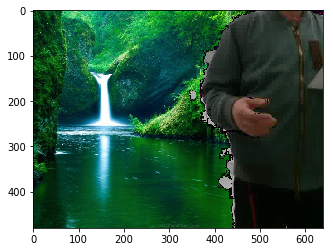

In [5]:
iter_bg = 0
# loop through all subdirts (a subdirt contains the frames of one gesture)
for subdirt_bg in background_data_subdirt:
    if (iter_bg == 1):
        break
    iter_bg += 1
    bg_frames = os.listdir(subdirt_bg)
    bg_frames.sort()
    
    iter_fg = 0
    for subdirt_fg in foreground_data_subdirt:
        if (iter_fg == 2):
            break
        iter_fg += 1
        
        subdirt_depth = subdirt_fg.replace(foreground_data_path + '/', depth_data_path)
        if not os.path.isdir(subdirt_depth):
            continue
        
        
        fg_frames = os.listdir(subdirt_fg)
        fg_frames.sort()
        
        # Making sure that the bkg and frg frames match in length
        if (len(bg_frames) == 1):
            bg_frames *= len(fg_frames)
        if (len(bg_frames) < len(fg_frames)):
            bg_frames += [bg_frames[len(bg_frames) - 1] * (len(fg_frames) - len(bg_frames))]
        if (len(bg_frames) > len(fg_frames)):
            bg_frames = bg_frames[0:len(fg_frames)]
        
        frames = []
        for i in range(0, len(fg_frames)):
            frames.append([bg_frames[i], fg_frames[i]])
          
        # loop through each frame in a gesture
        for frame in frames:
    
            # load the pixels of a background image (a frame)
            bg_path = subdirt_bg+'/'+frame[0]
            bg_img = Image.open(bg_path, 'r')
            pixels_of_bg_img = np.array(bg_img.getdata())
            pixels_of_bg_img = np.reshape(pixels_of_bg_img, (480, 640, 3))
            plt.imshow(pixels_of_bg_img, interpolation="none")
            plt.show()
        
            # load the pixels of an foreground image (a frame)
            fg_path = subdirt_fg+'/'+frame[1]
        
            fg_img = Image.open(fg_path, 'r')
            pixels_of_fg_img = np.array(fg_img.getdata())
            pixels_of_fg_img = np.reshape(pixels_of_fg_img, (480, 640, 3))
            plt.imshow(pixels_of_fg_img, interpolation="none")
            plt.show()
            
            # load the pixels of a depth image ( a frame)
            depth_path = subdirt_depth + '/' + frame[1]
            if not os.path.isfile(depth_path):
                continue
            
            depth_img = Image.open(depth_path, 'r')
            pixels_of_depth_img = np.array(depth_img.getdata())
            pixels_of_depth_img = np.reshape(pixels_of_depth_img, (480, 640, 3))
            plt.imshow(pixels_of_depth_img, interpolation="none")
            plt.show()
            
            temp_matrix_1 = (pixels_of_depth_img==[0, 0, 0])
            #temp_matrix_1 = np.greater([5,5,5], pixels_of_depth_img)
            pixels_of_bg_img = pixels_of_bg_img * temp_matrix_1
            #plt.imshow(pixels_of_bg_img, interpolation="none")
            #plt.show()
            
            pixels_added_bg_img = pixels_of_bg_img + pixels_of_fg_img
            plt.imshow(pixels_added_bg_img, interpolation="none")
            plt.show()
            
            pixels_added_bg_img = np.array(pixels_added_bg_img, dtype=np.uint8)
            added_bg_img = Image.fromarray(pixels_added_bg_img)
            
            if not os.path.isdir(added_bg_data_path+fg_path.replace(foreground_data_path, "").replace(frame[1], "")):
                
                print("create new dir: " + added_bg_data_path+fg_path.replace(foreground_data_path, "").replace(frame[1], ""))                 
                os.system("mkdir " + added_bg_data_path+fg_path.replace(foreground_data_path, "").replace(frame[1], ""))
            added_bg_img.save(added_bg_data_path+fg_path.replace(foreground_data_path, ""))


In [40]:

bg_frames

['waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg',
 'waterfall-forest-background-640x480-wallpaper.jpg']

In [41]:
fg_frames

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg']

In [48]:

frames

[['waterfall-forest-background-640x480-wallpaper.jpg', '00001.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00002.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00003.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00004.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00005.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00006.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00007.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00008.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00009.jpg'],
 ['waterfall-forest-background-640x480-wallpaper.jpg', '00010.jpg']]